In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import base64

In [3]:
df = pd.read_excel('../data/raw/Crisis_reports 2015-Present.xlsx')
# ../data_folder/data.csv

In [109]:
df.head()

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date,MONTH,DAY,YEAR
0,43653,2015000159907,NO ACTION POSSIBLE/NECESSARY,-,-,-1,-,-,-,NO,-,2015-05-15,2015-05,2015-05-15,2015
1,43719,2015000160408,UNABLE TO CONTACT,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,2015
2,43845,2015000160465,RESOURCES DECLINED,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,2015
3,43992,2015000159631,GERIATRIC REGIONAL ASSESSMENT TEAM,-,-,-1,-,-,-,NO,-,2015-05-15,2015-05,2015-05-15,2015
4,44102,-1,VOLUNTARY COMMITTAL,-,-,-1,-,-,-,NO,-,2015-05-16,2015-05,2015-05-16,2015


In [5]:
df.dtypes

Behavioral Crisis Num                   int64
CAD Event ID                            int64
Disposition                            object
Exhibiting Behavior (group)            object
Offense/Incident Ind                   object
Subject Age                             int64
Subject Gender                         object
Subject Race                           object
Techniques Used                        object
UoF Indicator                          object
Weapons Involved                       object
Reported Date (Date)           datetime64[ns]
dtype: object

In [131]:
yes_df = df[df['UoF']=='YES']
yes_df

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date,MONTH,DAY,YEAR
23,45345,2015000168005,SUBJECT ARRESTED,-,-,-1,-,-,-,YES,-,2015-05-22,2015-05,2015-05-22,2015
114,49408,2015000183323,SUBJECT ARRESTED,-,-,-1,-,-,-,YES,-,2015-06-02,2015-06,2015-06-02,2015
284,59139,2015000223133,SUBJECT ARRESTED,-,-,-1,-,-,-,YES,-,2015-07-01,2015-07,2015-07-01,2015
697,79547,2015000310474,EMERGENT DETENTION/ITA,-,-,-1,-,-,-,YES,-,2015-09-04,2015-09,2015-09-04,2015
727,80998,2015000316370,EMERGENT DETENTION/ITA,-,-,-1,-,-,-,YES,-,2015-09-09,2015-09,2015-09-09,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99907,23626983651,2021000108797,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,52,Female,Unknown,HANDCUFFING,YES,NONE/NOT APPLICABLE,2021-05-04,2021-05,2021-05-04,2021
99908,23626983651,2021000108797,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,52,Female,Unknown,VERBALIZATION,YES,NONE/NOT APPLICABLE,2021-05-04,2021-05,2021-05-04,2021
100006,25389288706,2020000307058,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,25,Male,Asian,GURNEY,YES,BLUNT OBJECT/STRIKING IMPLEMENT,2021-06-03,2021-06,2021-06-03,2021
100007,25389288706,2020000307058,ARRESTED (REQUIRES ARREST REPORT),VERBALLY THREATENING/AGGRESSIVE,OFFENSE,25,Male,Asian,HANDCUFFING,YES,BLUNT OBJECT/STRIKING IMPLEMENT,2021-06-03,2021-06,2021-06-03,2021


In [132]:
#subcat: yes only for disposition
# yes_df['Disposition'].groupby(level=None).size()
yes_df.groupby(['Disposition']).size() # len() 15

Disposition
-                                                                7
ARRESTED (REQUIRES ARREST REPORT)                             1099
CHRONIC COMPLAINT                                               18
CRISIS CLINIC                                                    1
CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)       7
DMHP/REFERRAL (DCR)                                             27
EMERGENT DETENTION/ITA                                        1189
MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED                    1
MOBILE CRISIS TEAM                                               2
NO ACTION POSSIBLE/NECESSARY                                    30
OTHER                                                           12
RESOURCES DECLINED                                               8
RESOURCES OFFERED/DECLINED                                       3
SUBJECT ARRESTED                                               494
VOLUNTARY COMMITTAL                               

In [128]:
#the entire data
df['Disposition'].value_counts().sort_values(ascending = False)

EMERGENT DETENTION/ITA                                        41087
NO ACTION POSSIBLE/NECESSARY                                  15932
ARRESTED (REQUIRES ARREST REPORT)                              6049
VOLUNTARY COMMITTAL                                            5879
CHRONIC COMPLAINT                                              4578
RESOURCES OFFERED/DECLINED                                     4095
RESOURCES DECLINED                                             3923
SUBJECT ARRESTED                                               3590
MOBILE CRISIS TEAM                                             2830
MCT (MOBILE CRISIS TEAM)                                       1984
OTHER                                                          1891
UNABLE TO CONTACT                                              1753
-                                                              1618
MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED                   851
CASE MANAGER/MH AGENCY NOTIFIED                 

In [127]:
# ax4 = yes_df.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
# ax4.set_title('Disposition Type')

OverflowError: int too big to convert

In [4]:
# df.columns

In [6]:
df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


<ipython-input-6-ffd2d72bc747>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


In [7]:
df['Disposition'] = df['Disposition'].str.upper().str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.upper().str.replace ("BEHAVIOR – ", "", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace ("\xa0", "", regex = True)
df['Offense/Incident Ind'] = df['Offense/Incident Ind'].str.upper()
df['Techniques Used'] = df['Techniques Used'].str.upper()
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("N", "NO", regex = True)
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("Y", "YES", regex = True)
df["Weapons Involved"] = df["Weapons Involved"].str.upper()
df['Weapons Involved'] = df['Weapons Involved'].str.replace("HANDGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("RIFLE", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("SHOTGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("OTHER FIREARM", "FIREARM", regex = True)

In [76]:
df = df.rename(columns = {'Exhibiting Behavior (group)': 'Behavior',
                          'Reported Date (Date)': 'Date',
                          'Offense/Incident Ind': 'OffenseIncident',
                          'Subject Age': 'Age',
                          'Subject Gender': 'Gender',
                          'Subject Race': 'Race',
                          'Techniques Used': 'Techniques',
                          'UoF Indicator': 'UoF',
                          'Weapons Involved': 'Weapons'})
#Convert ‘Date’ to DateTime ****NEW****
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
#Converts to the Month of each year
df['MONTH'] = df['Date'].dt.to_period('M')
#Group by number of incidents in each month/year
monthly_incidents = df.groupby(['MONTH']).size()
#result
monthly_incidents

MONTH
2015-05     403
2015-06     865
2015-07     848
2015-08     846
2015-09     794
           ... 
2021-02    2760
2021-03    3040
2021-04    3261
2021-05    3266
2021-06     840
Freq: M, Length: 74, dtype: int64

Text(0, 0.5, 'Number of Incidents')

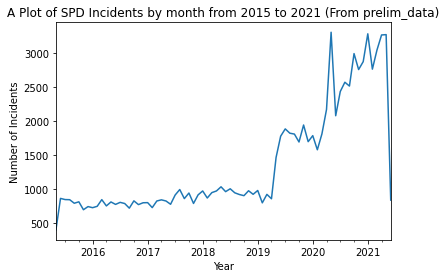

In [85]:
monthly_incidents.plot()
#labels
plt.title('A Plot of SPD Incidents by month from 2015 to 2021 (From prelim_data)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

In [106]:
#generate column by day of year
df['DAY'] = df['Date'].dt.to_period('D')
#group by day of year
# df['DAY'] = df['DAY'].groupby().sort_values(ascending = False)
daily_incidents = df['DAY'].value_counts(ascending = False)
daily_incidents

2021-06-02    202
2020-05-04    199
2020-05-14    189
2021-04-19    183
2021-01-27    180
             ... 
2017-06-10     10
2015-05-16      9
2015-05-19      7
2015-05-15      7
2021-06-08      2
Freq: D, Name: DAY, Length: 2217, dtype: int64

Text(0, 0.5, 'Number of Incidents')

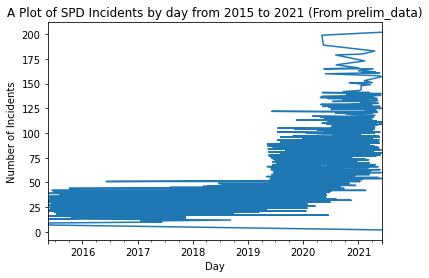

In [107]:
daily_incidents.plot()
plt.title('A Plot of SPD Incidents by day from 2015 to 2021 (From prelim_data)')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')

In [89]:
df['YEAR'] = pd.to_datetime(df['Date'])
df['YEAR'] = df['YEAR'].dt.to_period('Y')
yearly_incidents = df.groupby(['YEAR']).size()
yearly_incidents

YEAR
2015     6015
2016     9393
2017    10234
2018    11450
2019    17650
2020    28845
2021    16445
Freq: A-DEC, dtype: int64

In [92]:
#uof incidents by year
monthly_uof = df.groupby(['MONTH', 'UoF' ]).size()
monthly_uof.to_frame().reset_index()
monthly_uof['number_of_accidents'] = monthly_uof[0]
monthly_uof

MONTH                UoF
2015-05              NO      392
                     YES      11
2015-06              NO      849
                     YES      16
2015-07              NO      834
                            ... 
2021-05              NO     3186
                     YES      80
2021-06              NO      828
                     YES      12
number_of_accidents          392
Length: 149, dtype: int64

0
YEAR UoF           
2015 NO   98.204489
     YES   1.795511
2016 NO   98.658576
     YES   1.341424
2017 NO   98.338870
     YES   1.661130
2018 NO   97.572052
     YES   2.427948
2019 NO   97.235127
     YES   2.764873
2020 NO   95.746230
     YES   4.253770
2021 NO   96.941320
     YES   3.058680

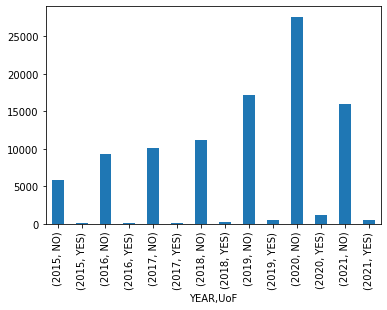

In [95]:
#uof incidents by year
yearly_uof= df.groupby(['YEAR', 'UoF']).size()
yearly_uof

yearly_uof.plot(kind = 'bar')

#proportion of uof by year
yearly_uof_proportion = (yearly_uof/yearly_incidents) * 100
yearly_uof_proportion

yearly_uof_proportion.to_frame()

In [97]:
#yearly offense incident
yearly_ofin= df.groupby(["YEAR", "OffenseIncident"]).size()
yearly_ofin

YEAR  OffenseIncident
2015  -                   6015
2016  -                   9393
2017  -                  10234
2018  -                  11450
2019  -                   9588
      INCIDENT            5426
      OFFENSE             2636
2020  -                  10892
      INCIDENT           12218
      OFFENSE             5735
2021  -                   8497
      INCIDENT            4773
      OFFENSE             3175
dtype: int64

<AxesSubplot:xlabel='YEAR,OffenseIncident'>

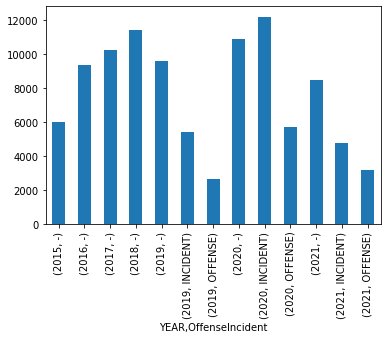

In [98]:
yearly_ofin.plot(kind = 'bar')

<AxesSubplot:xlabel='YEAR,Weapons'>

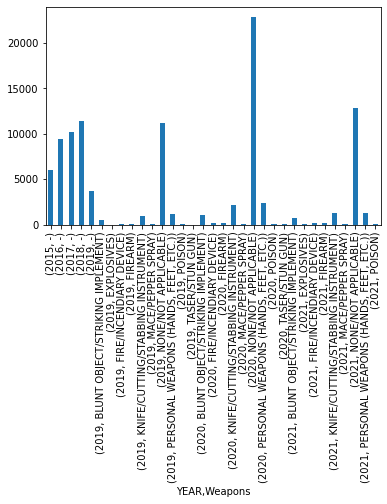

In [99]:
yearly_tech= df.groupby(["YEAR", "Weapons"]).size()
yearly_tech.plot(kind = 'bar')

In [100]:
yearly_tech

YEAR  Weapons                             
2015  -                                        6015
2016  -                                        9393
2017  -                                       10234
2018  -                                       11450
2019  -                                        3737
      BLUNT OBJECT/STRIKING IMPLEMENT           450
      EXPLOSIVES                                  4
      FIRE/INCENDIARY DEVICE                     54
      FIREARM                                    95
      KNIFE/CUTTING/STABBING INSTRUMENT         923
      MACE/PEPPER SPRAY                          19
      NONE/NOT APPLICABLE                     11200
      PERSONAL WEAPONS (HANDS, FEET, ETC.)     1129
      POISON                                     34
      TASER/STUN GUN                              5
2020  BLUNT OBJECT/STRIKING IMPLEMENT          1055
      FIRE/INCENDIARY DEVICE                    139
      FIREARM                                   192
      KNIFE/CUTTING/S

Text(0, 0.5, 'Frequency')

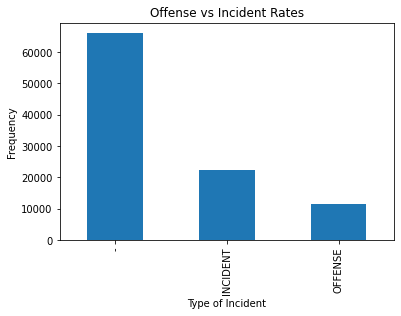

In [101]:
#group into categories
offense = df.groupby('OffenseIncident').size()
offense
offense.plot(kind = 'bar')
plt.title("Offense vs Incident Rates")
plt.xlabel("Type of Incident")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

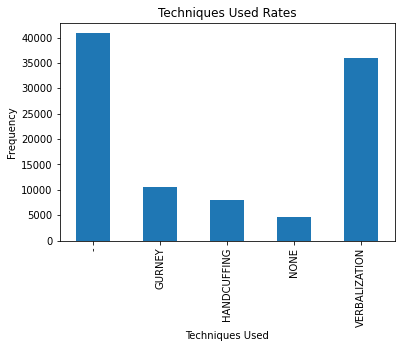

In [102]:
#group into categories
tech = df.groupby('Techniques').size()
tech
#TECHNIQUES USED PLOT
tech.plot(kind = 'bar')
plt.title("Techniques Used Rates")
plt.xlabel("Techniques Used")
plt.ylabel("Frequency")

In [47]:
df.head()
# df.shape #(100032, 12)

,Behavioral Crisis Num,CAD Event ID,Disposition,Exhibiting Behavior (group),Offense/Incident Ind,Subject Age,Subject Gender,Subject Race,Techniques Used,UoF Indicator,Weapons Involved,Reported Date (Date)
0,43653,2015000159907,NO ACTION POSSIBLE/NECESSARY,-,-,-1,-,-,-,NO,-,2015-05-15
1,43719,2015000160408,UNABLE TO CONTACT,-,-,-1,-,-,-,NO,-,2015-05-16
2,43845,2015000160465,RESOURCES DECLINED,-,-,-1,-,-,-,NO,-,2015-05-16
3,43992,2015000159631,GERIATRIC REGIONAL ASSESSMENT TEAM,-,-,-1,-,-,-,NO,-,2015-05-15
4,44102,-1,VOLUNTARY COMMITTAL,-,-,-1,-,-,-,NO,-,2015-05-16


In [69]:
df['Weapons Involved']

0                                            -
1                                            -
2                                            -
3                                            -
4                                            -
                          ...                 
100027                     NONE/NOT APPLICABLE
100028                       MACE/PEPPER SPRAY
100029    PERSONAL WEAPONS (HANDS, FEET, ETC.)
100030                     NONE/NOT APPLICABLE
100031                     NONE/NOT APPLICABLE
Name: Weapons Involved, Length: 100032, dtype: object

In [12]:
df['Exhibiting Behavior (group)'].unique() #len 27 previously 19

array(['-', 'BEHAVIOR - BELLIGERENT', 'BEHAVIOR - DISORDERLY',
       'BEHAVIOR - HALLUCINATIONS/DELUSIONS',
       'BEHAVIOR - NEGLECT/SELF CARE',
       'BEHAVIOR - OUT OF TOUCH WITH REALITY', 'BEHAVIOR - PARANOID',
       'BEHAVIOR - SUICIDE THREAT/ATTEMPT',
       'BEHAVIOR - UNUSUALLY FRIGHTENED/SCARED',
       'BELLIGERENT/UNCOOPERATIVE', 'BIZARRE/UNUSUAL',
       'COOPERATIVE/ATTENTIVE', 'DISORDERLY/DISRUPTIVE',
       'DISORGANIZED SPEECH/COMMUNICATION', 'DISORIENTATION/CONFUSION',
       'HALLUCINATIONS/DELUSIONS', 'HOPELESS/DEPRESSED', 'MANIC',
       'NEGLECT/SELF CARE', 'OTHER', 'OUT OF TOUCH WITH REALITY',
       'PARANOID', 'PHYSICALLY THREATENING/AGGRESSIVE',
       'SUICIDE BY COP (SBC)', 'SUICIDE THREAT/ATTEMPT',
       'UNUSUALLY FRIGHTENED/SCARED', 'VERBALLY THREATENING/AGGRESSIVE'],
      dtype=object)

In [13]:
df['Disposition'].unique()

array(['NO ACTION POSSIBLE/NECESSARY', 'UNABLE TO CONTACT',
       'RESOURCES DECLINED', 'GERIATRIC REGIONAL ASSESSMENT TEAM',
       'VOLUNTARY COMMITTAL', 'MOBILE CRISIS TEAM', 'CHRONIC COMPLAINT',
       '-', 'SUBJECT ARRESTED', 'SHELTER TRANSPORT',
       'EMERGENT DETENTION/ITA', 'CRISIS CLINIC',
       'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED',
       'DRUG/ALCOHOL TREATMENT REFERRAL', 'DMHP REFERRAL',
       'MCT (MOBILE CRISIS TEAM)', 'ARRESTED (REQUIRES ARREST REPORT)',
       'RESOURCES OFFERED/DECLINED', 'OTHER',
       'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)',
       'CASE MANAGER/MH AGENCY NOTIFIED', 'COURTESY TRANSPORT', 'DETOX',
       'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL',
       'DMHP/REFERRAL (DCR)', 'CRISIS CLINIC (CRISIS CONNECTIONS)',
       'SPRUCE STREET', 'CRISIS RESPONSE BULLETIN REFERENCED', 'SHELTER',
       "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"], dtype=object)

In [64]:
dd = df['Disposition'].drop_duplicates() #len() 30 still 30
dd.unique()

array(['NO ACTION POSSIBLE/NECESSARY', 'UNABLE TO CONTACT',
       'RESOURCES DECLINED', 'GERIATRIC REGIONAL ASSESSMENT TEAM',
       'VOLUNTARY COMMITTAL', 'MOBILE CRISIS TEAM', 'CHRONIC COMPLAINT',
       '-', 'SUBJECT ARRESTED', 'SHELTER TRANSPORT',
       'EMERGENT DETENTION/ITA', 'CRISIS CLINIC',
       'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED',
       'DRUG/ALCOHOL TREATMENT REFERRAL', 'DMHP REFERRAL',
       'MCT (MOBILE CRISIS TEAM)', 'ARRESTED (REQUIRES ARREST REPORT)',
       'RESOURCES OFFERED/DECLINED', 'OTHER',
       'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)',
       'CASE MANAGER/MH AGENCY NOTIFIED', 'COURTESY TRANSPORT', 'DETOX',
       'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL',
       'DMHP/REFERRAL (DCR)', 'CRISIS CLINIC (CRISIS CONNECTIONS)',
       'SPRUCE STREET', 'CRISIS RESPONSE BULLETIN REFERENCED', 'SHELTER',
       "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"], dtype=object)

In [67]:
len(df.isna())

100032

Text(0.5, 1.0, 'Exhibiting Behavior groups')

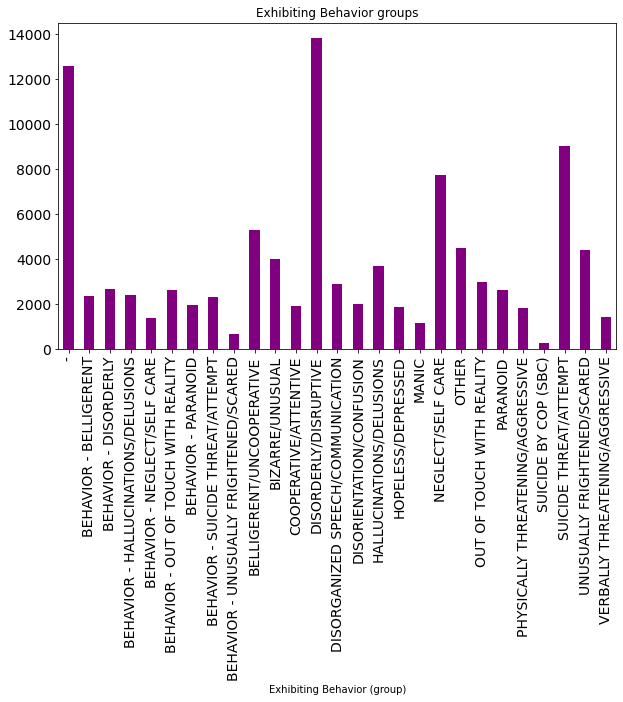

In [41]:
plot_bar = df.groupby(['Exhibiting Behavior (group)'])['Disposition'].count()
ax = plot_bar.plot(kind = 'bar', figsize = (10, 6), color= 'purple', fontsize=14)
ax.set_title('Exhibiting Behavior groups')


Text(0.5, 1.0, 'Disposition Type')

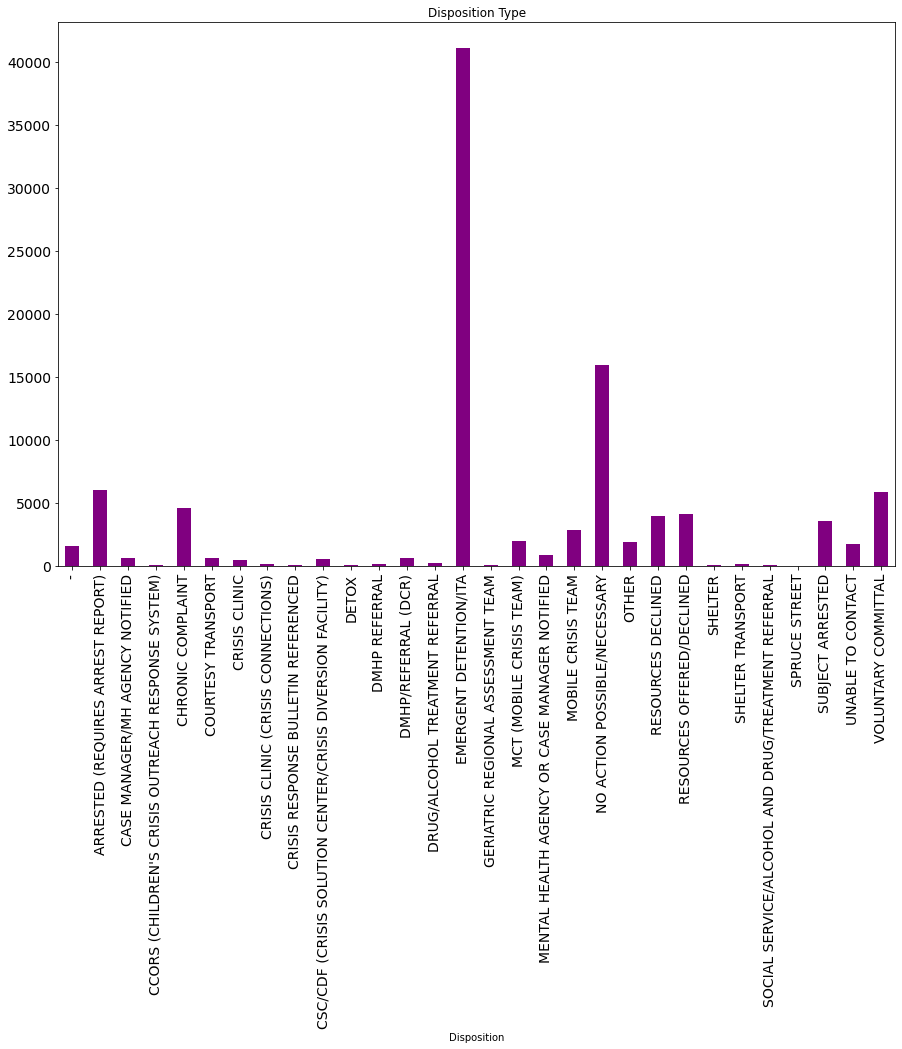

In [30]:
# plot_bar2 = df.groupby(['Disposition'])['Exhibiting Behavior (group)'].count()
plot_bar2 = df.groupby(['Disposition'])['Exhibiting Behavior (group)'].count()
ax2 = plot_bar2.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
ax2.set_title('Disposition Type')

In [40]:
df[df['Disposition']== 'EMERGENT DETENTION/ITA']['Disposition'].count() #41087
# df[df['Disposition']== 'EMERGENT DETENTION/ITA']

41087

In [57]:
# another method to get the bar plot for Disposition column
dis = df['Disposition'].value_counts()

Text(0.5, 1.0, 'Disposition Type')

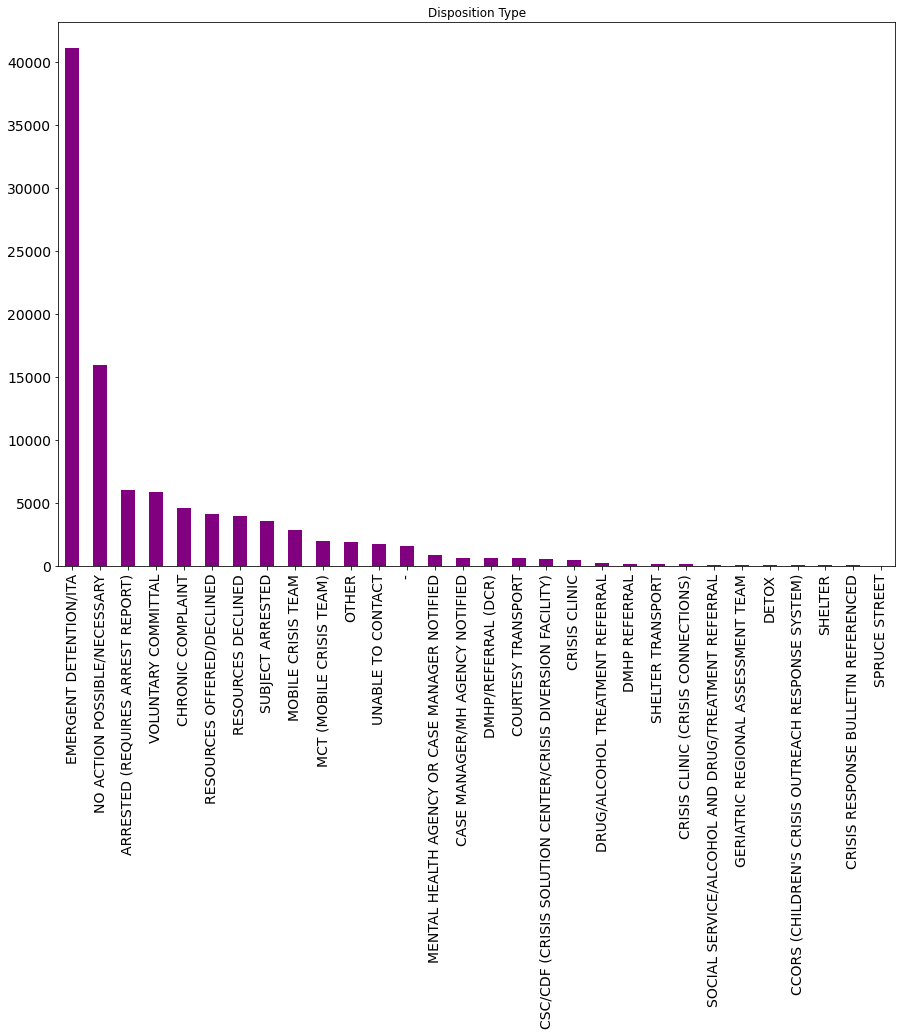

In [58]:
ax3 = dis.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
ax3.set_title('Disposition Type')

In [52]:
h = df.groupby('Disposition').size()
h

Disposition
-                                                              1618
ARRESTED (REQUIRES ARREST REPORT)                              6049
CASE MANAGER/MH AGENCY NOTIFIED                                 608
CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)               66
CHRONIC COMPLAINT                                              4578
COURTESY TRANSPORT                                              596
CRISIS CLINIC                                                   471
CRISIS CLINIC (CRISIS CONNECTIONS)                              154
CRISIS RESPONSE BULLETIN REFERENCED                              34
CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)      575
DETOX                                                            72
DMHP REFERRAL                                                   155
DMHP/REFERRAL (DCR)                                             606
DRUG/ALCOHOL TREATMENT REFERRAL                                 236
EMERGENT DETENTION/ITA              

In [17]:
df["Exhibiting Behavior (group)"].value_counts()

DISORDERLY/DISRUPTIVE                     13795
-                                         12575
SUICIDE THREAT/ATTEMPT                     8999
NEGLECT/SELF CARE                          7713
BELLIGERENT/UNCOOPERATIVE                  5274
OTHER                                      4492
UNUSUALLY FRIGHTENED/SCARED                4371
BIZARRE/UNUSUAL                            3993
HALLUCINATIONS/DELUSIONS                   3677
OUT OF TOUCH WITH REALITY                  2975
DISORGANIZED SPEECH/COMMUNICATION          2881
BEHAVIOR - DISORDERLY                      2645
PARANOID                                   2625
BEHAVIOR - OUT OF TOUCH WITH REALITY       2614
BEHAVIOR - HALLUCINATIONS/DELUSIONS        2396
BEHAVIOR - BELLIGERENT                     2361
BEHAVIOR - SUICIDE THREAT/ATTEMPT          2314
DISORIENTATION/CONFUSION                   1999
BEHAVIOR - PARANOID                        1923
COOPERATIVE/ATTENTIVE                      1908
HOPELESS/DEPRESSED                      

In [45]:
df[df['Subject Age']==-1].count() #43603

Behavioral Crisis Num          43603
CAD Event ID                   43603
Disposition                    43603
Exhibiting Behavior (group)    43603
Offense/Incident Ind           43603
Subject Age                    43603
Subject Gender                 43603
Subject Race                   43603
Techniques Used                43603
UoF Indicator                  43603
Weapons Involved               43603
Reported Date (Date)           43603
dtype: int64

In [59]:
my_contingency_table = pd.crosstab(index=df["Disposition"], columns=df["Exhibiting Behavior (group)"]) #rows is index
my_contingency_table

Exhibiting Behavior (group),-,BEHAVIOR - BELLIGERENT,BEHAVIOR - DISORDERLY,BEHAVIOR - HALLUCINATIONS/DELUSIONS,BEHAVIOR - NEGLECT/SELF CARE,BEHAVIOR - OUT OF TOUCH WITH REALITY,BEHAVIOR - PARANOID,BEHAVIOR - SUICIDE THREAT/ATTEMPT,BEHAVIOR - UNUSUALLY FRIGHTENED/SCARED,BELLIGERENT/UNCOOPERATIVE,...,MANIC,NEGLECT/SELF CARE,OTHER,OUT OF TOUCH WITH REALITY,PARANOID,PHYSICALLY THREATENING/AGGRESSIVE,SUICIDE BY COP (SBC),SUICIDE THREAT/ATTEMPT,UNUSUALLY FRIGHTENED/SCARED,VERBALLY THREATENING/AGGRESSIVE
Disposition,,,,,,,,,,,,,,,,,,,,,
-,522,0,0,0,0,0,0,0,0,61,...,0,169,126,0,0,0,0,158,174,0
ARRESTED (REQUIRES ARREST REPORT),202,526,482,192,105,343,192,130,39,533,...,126,93,174,278,155,391,41,135,31,285
CASE MANAGER/MH AGENCY NOTIFIED,21,23,33,26,7,26,16,8,10,26,...,15,17,30,32,33,19,1,12,9,17
CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),0,2,4,0,2,1,1,3,3,7,...,1,1,10,3,0,5,0,3,0,3
CHRONIC COMPLAINT,1151,53,65,102,17,100,63,10,20,240,...,20,400,190,93,124,12,0,213,461,12
COURTESY TRANSPORT,37,10,15,29,10,26,29,9,17,20,...,9,10,37,27,47,1,0,12,17,4
CRISIS CLINIC,142,0,0,0,0,0,0,0,0,7,...,0,47,36,0,0,0,0,70,89,0
CRISIS CLINIC (CRISIS CONNECTIONS),11,3,5,4,4,4,8,3,3,11,...,3,1,2,5,17,7,0,2,4,0
CRISIS RESPONSE BULLETIN REFERENCED,2,2,3,7,1,3,3,0,0,1,...,0,0,3,0,0,0,1,0,0,1


<AxesSubplot:xlabel='Exhibiting Behavior (group)', ylabel='Disposition'>

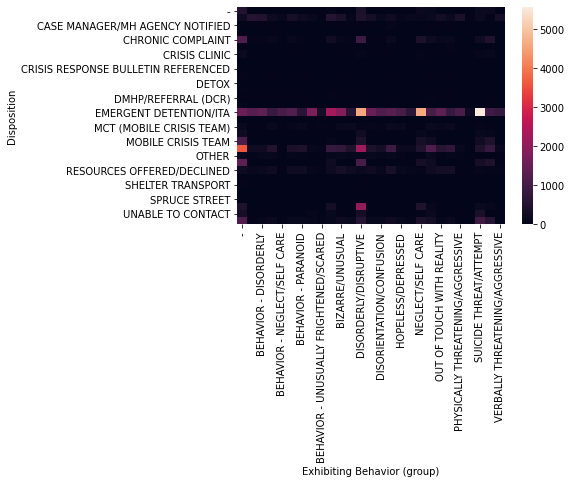

In [62]:
sns.heatmap(my_contingency_table)